In [16]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
import pickle

from src.parsers import NewsgroupsParser, ReutersParser
from src.engines.doc2vec import Doc2VecModel

In [6]:
REUTERS = ReutersParser()

In [7]:
model = Doc2VecModel(dataset=REUTERS, use_predictor=False)

In [8]:
labels = []

for entry in model.dataset.entries:
    for label in entry.labels:
        if label not in labels:
            labels.append(label)

# get train and test sets
X = np.array([vector for vector in map(
    lambda e: model.model.dv[e.id],
    model.dataset.entries)])
y = np.array([
    y_labs for y_labs in map(
    lambda e: np.array(np.array(
        [int(label in e.labels) for label in labels])),
    model.dataset.entries)]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
parameters = {
    "estimator__C": [1, 4],
    "estimator__kernel": ["poly"],
    "estimator__degree":[2, 3, 4],
}

model = OneVsRestClassifier(SVC())

clf = GridSearchCV(model, param_grid=parameters, scoring='f1_micro')

In [10]:
clf.fit(X_train, y_train)

/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 53 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 65 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 53 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 65 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 53 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 65 is present in all training examples.
  warnings.warn(
/home/samueldsr/.local/lib/python3.10/site-packages/

GridSearchCV(estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [1, 4], 'estimator__degree': [2, 3, 4],
                         'estimator__kernel': ['poly']},
             scoring='f1_micro')

In [11]:
print(clf.best_params_)
print(clf.best_score_)

{'estimator__C': 4, 'estimator__degree': 2, 'estimator__kernel': 'poly'}
0.779011046468671


In [12]:
clf = OneVsRestClassifier(SVC(C=4, degree=3, kernel='poly'))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=4, kernel='poly'))

In [13]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        85
           1       0.83      0.75      0.79       118
           2       0.84      0.71      0.77       108
           3       0.83      0.24      0.37        21
           4       0.79      0.55      0.65        49
           5       0.00      0.00      0.00         9
           6       0.89      0.62      0.73        13
           7       0.79      0.52      0.62        29
           8       0.50      0.08      0.14        12
           9       0.67      0.20      0.31        10
          10       0.81      0.48      0.60        27
          11       0.83      0.67      0.74        60
          12       0.90      0.73      0.81        26
          13       1.00      0.50      0.67         4
          14       0.70      0.68      0.69        57
          15       0.93      0.89      0.91        28
          16       0.90      0.89      0.90       471
          17       0.78    

In [14]:
score = cross_validate(clf, X, y, cv=5, scoring='f1_micro')
score

{'fit_time': array([18.74481845, 17.31552124, 22.86772895, 19.00322938, 27.11241102]),
 'score_time': array([1.97315073, 2.51908994, 1.91691756, 2.05015612, 2.38943958]),
 'test_score': array([0.74845402, 0.7727366 , 0.75914149, 0.79130435, 0.79537477])}

In [15]:
score['test_score'].mean()

0.7734022467820375

In [23]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt

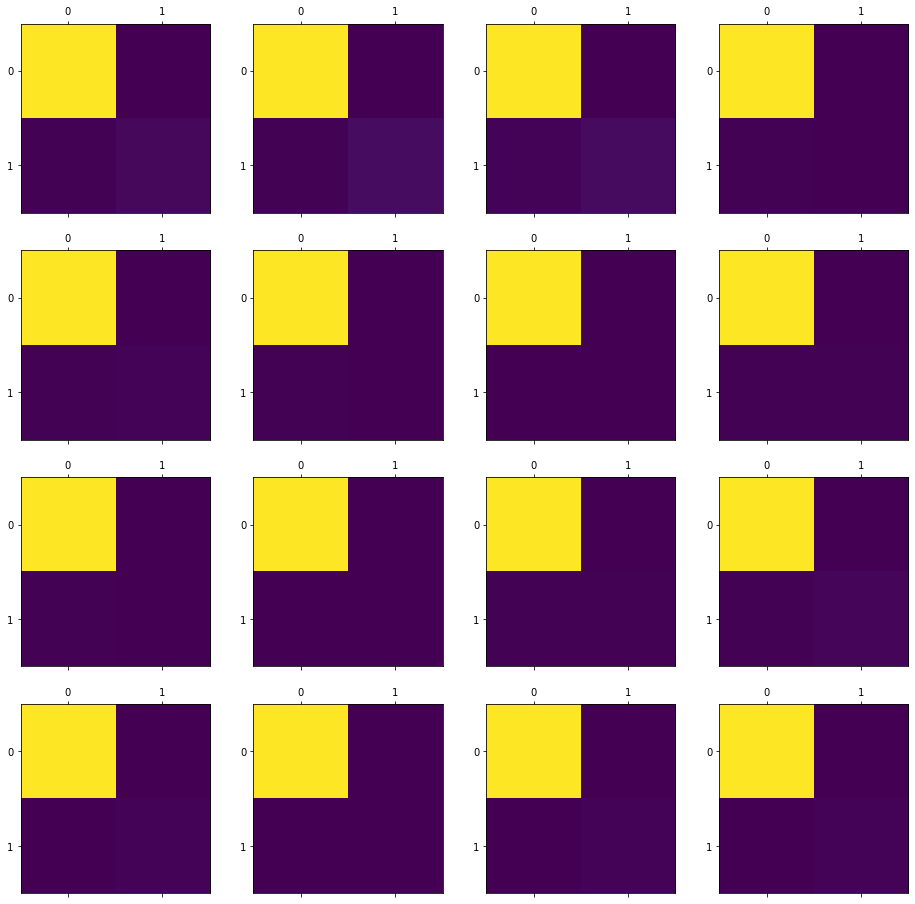

In [60]:
matrix = multilabel_confusion_matrix(y_test, y_pred)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

n = len(axs)
m = len(axs[0])
for i in range(n):
    for j in range(m):
        axs[i, j].matshow(matrix[i * n + j])